In [ ]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [26]:
path = "C:/Users/user/PycharmProjects/py-adult-data-analysis/data/adult.csv"
data_csv = pd.read_csv(path, index_col=[0])

rows_to_drop = [index for index, row in data_csv.iterrows() if "?" in row.values]
data_csv_cleaned = data_csv.drop(rows_to_drop)

data_csv_cleaned.describe()


,age,hours-per-week,salary K$
count,30162.000000,30162.000000,30162.000000
mean,38.437902,40.931238,73.968570
std,13.134665,11.979984,85.365144
min,17.000000,1.000000,15.000000
25%,28.000000,40.000000,26.000000
50%,37.000000,40.000000,38.000000
75%,47.000000,45.000000,49.000000
max,90.000000,99.000000,349.000000


# Task 1
Print the count of men and women in the dataset.

In [27]:
data_csv_cleaned["sex"].value_counts()

sex
Male      20380
Female     9782
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [28]:
mens = data_csv_cleaned[data_csv_cleaned["sex"] == "Male"]
mens["age"].mean()

np.float64(39.18400392541707)

# Task 3
Get the percentage of people from Poland (native-country)

In [32]:
total_people = len(data_csv_cleaned)
people_from_poland = len(data_csv_cleaned[data_csv_cleaned["native-country"] == "Poland"])
result = (people_from_poland / total_people) * 100
print(f"{round(result, 10)}%")

0.1856640806%


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [42]:
high_earners = data_csv_cleaned[data_csv_cleaned['salary'] == '>50K']
mean_age_high_earners = high_earners['age'].mean()
std_age_high_earners = high_earners['age'].std()

print(f"First answer:\n"
      f"\tMean: {mean_age_high_earners}%"
      f"\tStandard deviation: {std_age_high_earners}%")

low_earners = data_csv_cleaned[data_csv_cleaned['salary'] == '<=50K']
mean_age_low_earners = low_earners['age'].mean()
std_age_low_earners = low_earners['age'].std()

print(f"Second answer:\n"
      f"\tMean: {mean_age_low_earners}%"
      f"\tStandard deviation: {std_age_low_earners}%")

First answer:
	Mean: 43.95911028236548%	Standard deviation: 10.269632835673852%
Second answer:
	Mean: 36.60806038668668%	Standard deviation: 13.464631257161633%


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [45]:
higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
non_higher_education_high_earners = data_csv_cleaned[(data_csv_cleaned['salary'] == '>50K') & (~data_csv_cleaned['education'].isin(higher_education))]

if len(non_higher_education_high_earners) > 0:
    print(f"People without higher education (>50K$): {non_higher_education_high_earners}")
else:
    print("No such people.")

People without higher education (>50K$):        age         workclass     education      marital-status  \
7       52  Self-emp-not-inc       HS-grad  Married-civ-spouse   
10      37           Private  Some-college  Married-civ-spouse   
55      43           Private  Some-college  Married-civ-spouse   
67      53           Private       HS-grad  Married-civ-spouse   
68      49      Self-emp-inc  Some-college  Married-civ-spouse   
...    ...               ...           ...                 ...   
32462   48      Self-emp-inc       HS-grad  Married-civ-spouse   
32518   57         Local-gov       HS-grad  Married-civ-spouse   
32519   46           Private  Some-college  Married-civ-spouse   
32557   40           Private       HS-grad  Married-civ-spouse   
32560   52      Self-emp-inc       HS-grad  Married-civ-spouse   

              occupation relationship   race     sex  hours-per-week  \
7        Exec-managerial      Husband  White    Male              45   
10       Exec-manageri

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [46]:
data_csv_cleaned.groupby('education')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [55]:
men_data = data_csv_cleaned[data_csv_cleaned['sex'] == 'Male']
married_men = men_data[men_data['marital-status'].str.startswith('Married')]
non_married_men = men_data[~men_data['marital-status'].str.startswith('Married')]

married_earners_high = married_men[married_men['salary'] == '>50K'].shape[0]
married_earners_low = married_men[married_men['salary'] == '<=50K'].shape[0]
total_married_men = married_men.shape[0]
percent_married_high = (married_earners_high / total_married_men) * 100 if total_married_men > 0 else 0
percent_married_low = (married_earners_low / total_married_men) * 100 if total_married_men > 0 else 0

non_married_earners_high = non_married_men[non_married_men['salary'] == '>50K'].shape[0]
non_married_earners_low = non_married_men[non_married_men['salary'] == '<=50K'].shape[0]
total_non_married_men = non_married_men.shape[0]
percent_non_married_high = (non_married_earners_high / total_non_married_men) * 100 if total_non_married_men > 0 else 0
percent_non_married_low = (non_married_earners_low / total_non_married_men) * 100 if total_non_married_men > 0 else 0

print(f"Percentage of married men (>50K$): {percent_married_high}%")
print(f"Percentage of married men (<=50K$): {percent_married_low}%")
print(f"Percentage of non-married men (>50K$): {percent_non_married_high}%")
print(f"Percentage of non-married men (<=50K$): {percent_non_married_low}%")

if percent_married_high > percent_non_married_high:
    print("Married men earn more than non-married men.")
else:
    print("Non-married men earn more than married men.")

Percentage of married men (>50K$): 44.79843444227006%
Percentage of married men (<=50K$): 55.201565557729936%
Percentage of non-married men (>50K$): 8.849441157133466%
Percentage of non-married men (<=50K$): 91.15055884286653%
Married men earn more than non-married men.


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [50]:
max_hours_per_week = data_csv_cleaned['hours-per-week'].max()
count_max_hours = data_csv_cleaned[data_csv_cleaned['hours-per-week'] == max_hours_per_week].shape[0]

print(f"The maximum hours worked per week is: {max_hours_per_week}")
print(f"Number of people working {max_hours_per_week} hours per week: {count_max_hours}")

The maximum hours worked per week is: 99
Number of people working 99 hours per week: 78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

Correlation matrix:
                                     age  hours-per-week  salary K$  \
age                             1.000000        0.068756   0.201774   
hours-per-week                  0.068756        1.000000   0.196916   
salary K$                       0.201774        0.196916   1.000000   
workclass_Federal-gov           0.051227        0.013293   0.052179   
workclass_Local-gov             0.060901        0.011576   0.028871   
...                                  ...             ...        ...   
native-country_Trinadad&Tobago  0.004843       -0.006006  -0.003691   
native-country_United-States    0.015917        0.002446   0.028293   
native-country_Vietnam         -0.015054       -0.011379  -0.014626   
native-country_Yugoslavia       0.000375        0.007408   0.008678   
salary_>50K                     0.234037        0.229689   0.855788   

                                workclass_Federal-gov  workclass_Local-gov  \
age                                          0.05

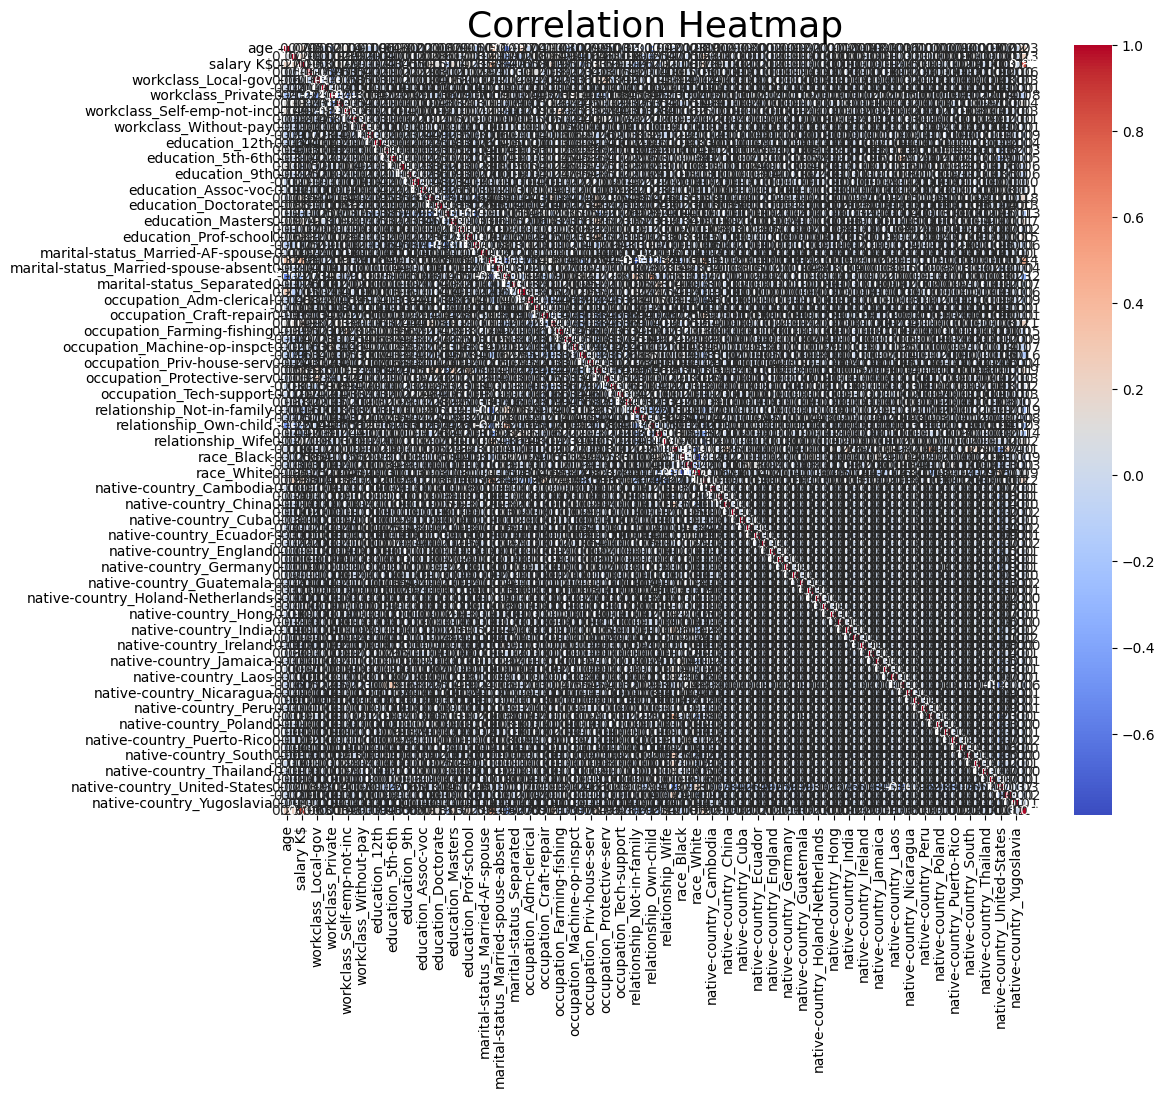


Significant correlations (|correlation| > 0.5):
marital-status_Never-married and age: -0.53
marital-status_Never-married and marital-status_Married-civ-spouse: -0.64
relationship_Not-in-family and marital-status_Married-civ-spouse: -0.54
relationship_Own-child and marital-status_Never-married: 0.51
race_White and race_Black: -0.79
salary_>50K and salary K$: 0.86


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns


# Convert categorical columns to numerical codes for correlation analysis
# For simplicity, we'll use categorical columns that are relevant for correlation
# Converting categorical columns to numerical
data_csv_encoded = pd.get_dummies(data_csv, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = data_csv_encoded.corr()

# Print the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1)
heatmap.set_title('Correlation Heatmap', size=16)
plt.show()

# Highlight significant correlations
# Define a threshold for strong correlation
threshold = 0.5

# Find and print pairs of features with strong correlations
print("\nSignificant correlations (|correlation| > {}):".format(threshold))
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            print(f"{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")